# Predict Physicochemical Properties of Protein Tertiary Structure

# Dataset

This is a data set of Physicochemical Properties of Protein Tertiary Structure. The data set is taken from CASP 5-9. There are 45730 decoys and size varying from 0 to 21 armstrong. Further details are, F1 - Total surface area. F2 - Non polar exposed area. F3 - Fractional area of exposed non polar residue. F4 - Fractional area of exposed non polar part of residue. F5 - Molecular mass weighted exposed area. F6 - Average deviation from standard exposed area of residue. F7 - Euclidian distance. F8 - Secondary structure penalty. F9 - Spacial Distribution constraints (N,K Value).

In [1]:
import pandas as pd
import os

DATASET_PATH = '/cxldata/datasets/bootml/Protein_dataset_1/'
def load_dataset_data(dataset_path=DATASET_PATH): 
    csv_path = os.path.join(dataset_path, "CASP.csv") 
    return pd.read_csv(csv_path)

In [2]:
Protein_Dataset = load_dataset_data()
Protein_Dataset.head()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


## Drop the irrelevant fields from our file


In [3]:
for x in ['F5','F9', ]:
    Protein_Dataset = Protein_Dataset.drop(x,axis=1)

In [4]:
Protein_Dataset.head()

,RMSD,F1,F2,F3,F4,F6,F7,F8
0,17.284,13558.30,4305.35,0.31754,162.1730,215.3590,4287.87,102
1,6.021,6191.96,1623.16,0.26213,53.3894,87.2024,3328.91,39
2,9.275,7725.98,1726.28,0.22343,67.2887,81.7913,2981.04,29
3,15.851,8424.58,2368.25,0.28111,67.8325,109.4390,3248.22,70
4,7.962,7460.84,1736.94,0.23280,52.4123,94.5234,2814.42,41


## Data Info

In [5]:
Protein_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 8 columns):
RMSD    45730 non-null float64
F1      45730 non-null float64
F2      45730 non-null float64
F3      45730 non-null float64
F4      45730 non-null float64
F6      45730 non-null float64
F7      45730 non-null float64
F8      45730 non-null int64
dtypes: float64(7), int64(1)
memory usage: 2.8 MB


In [6]:
Protein_Dataset.describe()

,RMSD,F1,F2,F3,F4,F6,F7,F8
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,145.638061,3989.755990,69.975071
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,69.999230,1993.574575,56.493443
min,0.000000,2392.050000,403.500000,0.092500,10.310100,31.970400,0.000000,0.000000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,94.757500,3165.322500,31.000000
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,126.176000,3840.170000,54.000000
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,181.468500,4644.192500,91.000000
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,598.408000,105948.170000,350.000000


## Plot histogram

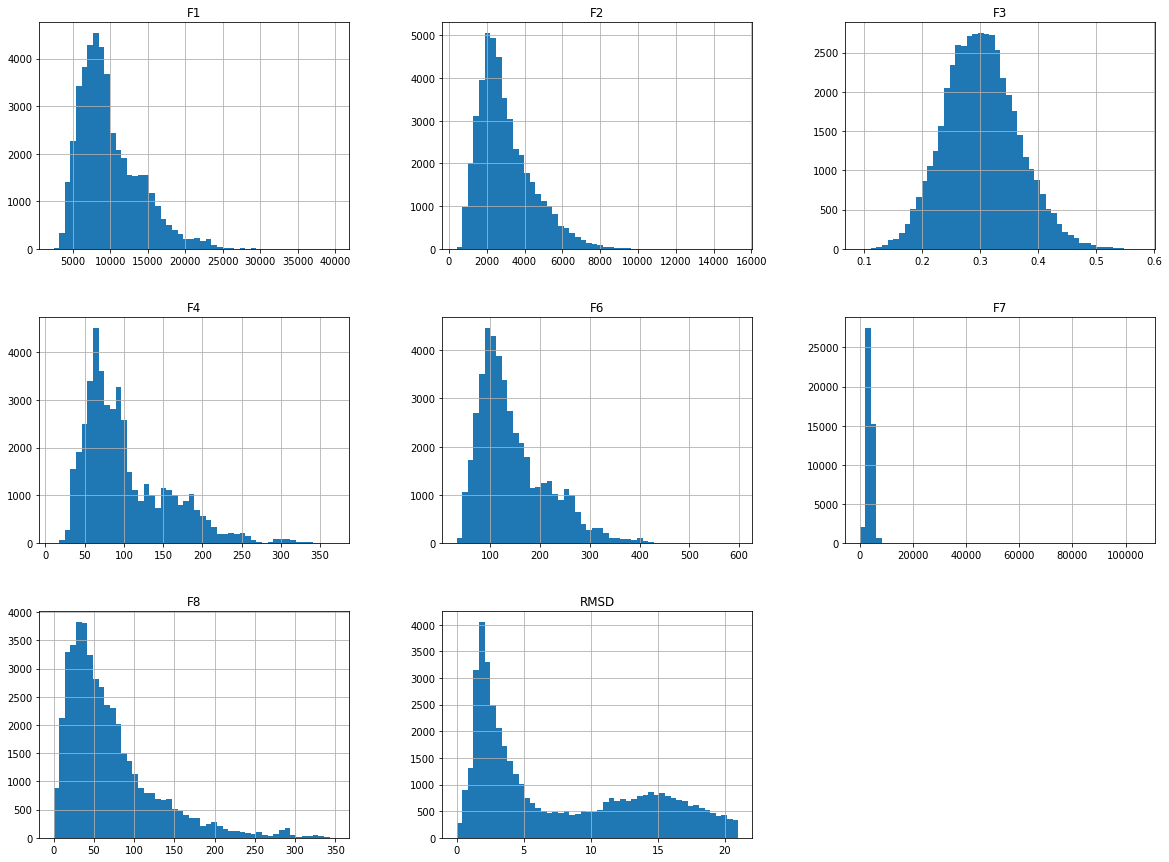

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
Protein_Dataset.hist(bins=50, figsize=(20,15))
plt.show()

## Split dataset into test and training set

In [8]:
import numpy as np

np.random.seed(42)

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Protein_Dataset, test_size=0.2, random_state=42)

print ("Length of train set is", len(train_set))
print ("Length of test set is", len(test_set))


Length of train set is 36584
Length of test set is 9146


# Stratified sampling

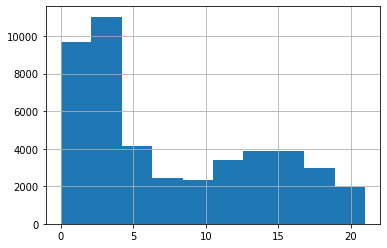

In [10]:
Protein_Dataset['RMSD'].hist()

In [11]:
from sklearn.impute import SimpleImputer
if "RMSD" in ['RMSD','F1','F2','F3','F4','F6','F7','F8', ]:
    imp=SimpleImputer(strategy="mean")
    Protein_Dataset["RMSD"]=imp.fit_transform(Protein_Dataset[["RMSD"]]).ravel()


In [12]:
# Divide by 1.5 to limit the number of RMSD categories
# Round up using ceil to have discrete categories
Protein_Dataset["RMSD_cat"] = np.ceil(Protein_Dataset["RMSD"] / 1.5)

In [13]:
Protein_Dataset["RMSD_cat"].value_counts()

2.0     11741
3.0      5780
1.0      3760
10.0     2934
4.0      2894
11.0     2820
9.0      2565
8.0      2359
12.0     2290
13.0     1800
5.0      1768
7.0      1714
6.0      1671
14.0     1362
0.0       272
Name: RMSD_cat, dtype: int64

In [14]:
Protein_Dataset["RMSD_cat"].where(Protein_Dataset["RMSD_cat"] < 5, 5.0, inplace=True)


In [15]:
Protein_Dataset["RMSD_cat"].value_counts()

5.0    21283
2.0    11741
3.0     5780
1.0     3760
4.0     2894
0.0      272
Name: RMSD_cat, dtype: int64

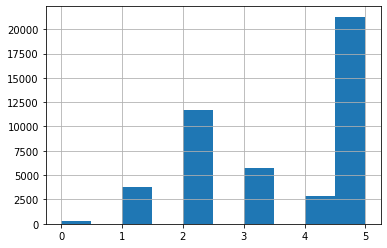

In [16]:
Protein_Dataset["RMSD_cat"].hist()

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Protein_Dataset, Protein_Dataset["RMSD_cat"]):
    strat_train_set = Protein_Dataset.iloc[train_index]
    strat_test_set = Protein_Dataset.iloc[test_index]

In [18]:
strat_test_set["RMSD_cat"].value_counts() / len(strat_test_set)

5.0    0.465449
2.0    0.256724
3.0    0.126394
1.0    0.082222
4.0    0.063306
0.0    0.005904
Name: RMSD_cat, dtype: float64

In [19]:
Protein_Dataset["RMSD_cat"].value_counts() / len(Protein_Dataset)

5.0    0.465406
2.0    0.256746
3.0    0.126394
1.0    0.082222
4.0    0.063284
0.0    0.005948
Name: RMSD_cat, dtype: float64

In [20]:
# compare RMSD category proportion in Stratified Sampling and Random Sampling

def RMSD_cat_proportions(data):
    return data["RMSD_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(Protein_Dataset, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": RMSD_cat_proportions(Protein_Dataset),
    "Stratified": RMSD_cat_proportions(strat_test_set),
    "Random": RMSD_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [21]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
0.0,0.005948,0.005904,0.006451,8.455882,-7.352941e-01
1.0,0.082222,0.082222,0.085830,4.388298,1.421085e-14
2.0,0.256746,0.256724,0.254647,-0.817648,-8.517162e-03
3.0,0.126394,0.126394,0.123661,-2.162630,0.000000e+00
4.0,0.063284,0.063306,0.065274,3.144437,3.455425e-02
5.0,0.465406,0.465449,0.464137,-0.272518,9.397171e-03


In [22]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("RMSD_cat", axis=1, inplace=True)

/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
Protein_Dataset = strat_train_set.copy()
test_set = strat_test_set.copy()
train_set = strat_train_set.copy()

# Discover and visualize the data to gain insights

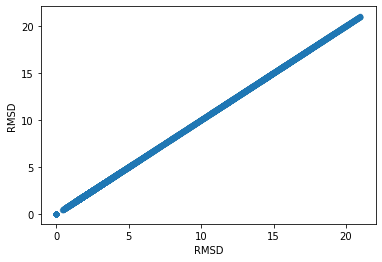

In [24]:
Protein_Dataset.plot(kind="scatter", x="RMSD", y="RMSD", alpha=0.1)

In [25]:
corr_matrix = Protein_Dataset.corr()
corr_matrix

,RMSD,F1,F2,F3,F4,F6,F7,F8
RMSD,1.000000,-0.015745,0.155842,0.373773,-0.170035,-0.037077,-0.004989,-0.003845
F1,-0.015745,1.000000,0.907189,0.125762,0.930909,0.967483,0.543425,0.652356
F2,0.155842,0.907189,1.000000,0.500769,0.793359,0.908827,0.504815,0.584513
F3,0.373773,0.125762,0.500769,1.000000,0.030593,0.200383,0.075365,0.093076
F4,-0.170035,0.930909,0.793359,0.030593,1.000000,0.938378,0.476865,0.678841
F6,-0.037077,0.967483,0.908827,0.200383,0.938378,1.000000,0.527551,0.663723
F7,-0.004989,0.543425,0.504815,0.075365,0.476865,0.527551,1.000000,0.340516
F8,-0.003845,0.652356,0.584513,0.093076,0.678841,0.663723,0.340516,1.000000


In [26]:
for x in ['F8', ]:
    print (corr_matrix[x])

RMSD   -0.003845
F1      0.652356
F2      0.584513
F3      0.093076
F4      0.678841
F6      0.663723
F7      0.340516
F8      1.000000
Name: F8, dtype: float64


In [27]:
for x in ['F8', ]:
    print (corr_matrix[x].sort_values(ascending=False))

F8      1.000000
F4      0.678841
F6      0.663723
F1      0.652356
F2      0.584513
F7      0.340516
F3      0.093076
RMSD   -0.003845
Name: F8, dtype: float64


# Scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9eb0e4b240>,
      dtype=object)

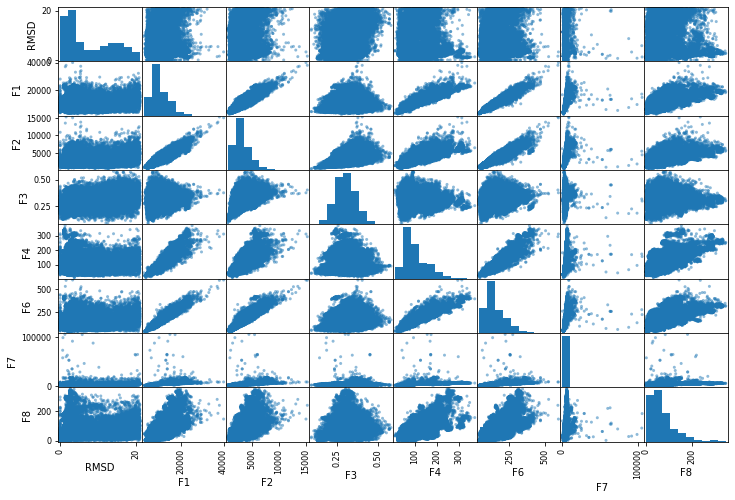

In [28]:
# from pandas.tools.plotting import scatter_matrix 

from pandas.plotting import scatter_matrix

x = 0
attributes = []
for x in ['RMSD','F1','F2','F3','F4','F6','F7','F8', ]:
    attributes.append(x)
scatter_matrix(Protein_Dataset[attributes], figsize=(12, 8))

In [29]:
Protein_Dataset.describe()

,RMSD,F1,F2,F3,F4,F6,F7,F8
count,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000
mean,7.744333,9881.651586,3020.517975,0.302416,103.663672,145.814666,3992.894609,70.219358
std,6.115636,4067.920490,1465.723743,0.062737,55.535359,70.157917,2029.530630,56.764919
min,0.000000,2392.050000,403.500000,0.092500,10.689100,31.970400,0.000000,0.000000
25%,2.305000,6933.520000,1983.250000,0.258947,63.645975,94.704375,3165.902500,31.000000
50%,5.032500,8903.735000,2670.430000,0.300170,87.843450,126.329000,3842.180000,54.000000
75%,13.365500,12145.325000,3792.775000,0.342843,134.023000,181.822500,4644.750000,91.000000
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,598.408000,105948.170000,350.000000


In [30]:
x = 0
for x in ['F8', ]:
    Protein_Dataset = train_set.drop(x, axis=1) # drop label for training set
    Protein_Dataset_labels = train_set[x].copy()


In [31]:
sample_incomplete_rows = Protein_Dataset[Protein_Dataset.isnull().any(axis=1)].head()
sample_incomplete_rows

,RMSD,F1,F2,F3,F4,F6,F7


In [32]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [34]:
Protein_Dataset_num = Protein_Dataset

## Feature scaling

In [35]:

from mlxtend.preprocessing import minmax_scaling
num_variables_min_max = []
for x in ['RMSD','F1','F2','F3','F4','F6','F7', ]:
    num_variables_min_max.append(x)
Protein_Dataset_num_min_max = Protein_Dataset_num[num_variables_min_max]
Protein_Dataset_num_min_max.head()

,RMSD,F1,F2,F3,F4,F6,F7
4807,3.939,9276.42,3803.15,0.40998,89.4560,131.9670,3859.55
13741,3.723,6020.43,1459.22,0.24237,54.0961,70.3864,2543.26
29298,2.809,12667.60,2961.74,0.23380,162.2000,196.0210,4188.36
39070,1.820,5716.29,1453.34,0.25424,59.4401,80.3096,3064.87
45312,10.879,6339.94,1951.77,0.30785,56.1016,75.8991,2604.42


In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
num_attribs_min_max = list(Protein_Dataset_num_min_max)
num_pipeline_min_max = Pipeline([
    ('selector', DataFrameSelector(num_attribs_min_max)),
    ('imputer', SimpleImputer(strategy="mean")),
    ('min_max_scaler', MinMaxScaler()),
])


In [37]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline_min_max", num_pipeline_min_max),
])


In [38]:
Protein_Dataset.head()

,RMSD,F1,F2,F3,F4,F6,F7
4807,3.939,9276.42,3803.15,0.40998,89.4560,131.9670,3859.55
13741,3.723,6020.43,1459.22,0.24237,54.0961,70.3864,2543.26
29298,2.809,12667.60,2961.74,0.23380,162.2000,196.0210,4188.36
39070,1.820,5716.29,1453.34,0.25424,59.4401,80.3096,3064.87
45312,10.879,6339.94,1951.77,0.30785,56.1016,75.8991,2604.42


In [39]:
Protein_Dataset_prepared = full_pipeline.fit_transform(Protein_Dataset)
print(Protein_Dataset_prepared[0])
print(Protein_Dataset_prepared[1])
print(Protein_Dataset_prepared[2])

[0.18758036 0.18288652 0.22803434 0.6543416  0.21963406 0.17653595
 0.03642866]
[0.17729416 0.09638962 0.07081329 0.3088893  0.12103632 0.06782036
 0.02400476]
[0.13376827 0.27297481 0.17159607 0.29122612 0.42247382 0.28961813
 0.03953216]


In [40]:
Protein_Dataset_prepared.shape

(36584, 7)

# Train a model 

In [41]:
# Function to display scores of our alogorithms for cross-validation

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [42]:
# Train a Linear Regression model

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(Protein_Dataset_prepared, Protein_Dataset_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# Calculate the RMSE in Linear Regression Model

from sklearn.metrics import mean_squared_error

Protein_Dataset_predictions = lin_reg.predict(Protein_Dataset_prepared)
lin_mse = mean_squared_error(Protein_Dataset_labels, Protein_Dataset_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

41.07782412827282

In [44]:
# K-fold Cross Validation for Linear Regression
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, Protein_Dataset_prepared, Protein_Dataset_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [41.00221125 42.01895458 41.40265222 40.57101612 41.20421939 40.10021805
 41.63009069 41.27708257 41.53578257 40.14963099]
Mean: 41.08918584408427
Standard deviation: 0.6033391018341968


In [45]:
# Train a model using Decision Tree

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(Protein_Dataset_prepared, Protein_Dataset_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [46]:
# Calculate RMSE in Decision Tree model
from sklearn.metrics import mean_squared_error

Protein_Dataset_predictions = tree_reg.predict(Protein_Dataset_prepared)
tree_mse = mean_squared_error(Protein_Dataset_labels, Protein_Dataset_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.026141133207971203

In [47]:
# K-fold Cross Validation for Decision Tree Model
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(tree_reg, Protein_Dataset_prepared, Protein_Dataset_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [48]:
display_scores(tree_rmse_scores)

Scores: [31.64824973 32.90282864 33.42182796 30.99846266 32.48307062 32.42221629
 31.09188595 32.12423771 32.91367505 30.53481843]
Mean: 32.05412730478603
Standard deviation: 0.9037417252517926


In [49]:
# Train a model using Random Forests

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(Protein_Dataset_prepared, Protein_Dataset_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [50]:
# Calculate RMSE in Random Forest model
from sklearn.metrics import mean_squared_error

Protein_Dataset_predictions = forest_reg.predict(Protein_Dataset_prepared)
forest_mse = mean_squared_error(Protein_Dataset_labels, Protein_Dataset_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

8.411546785090408

In [51]:
# Cross Validation in Random Forest model

from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, Protein_Dataset_prepared, Protein_Dataset_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [22.11618677 23.09862055 23.59118682 21.30033176 23.39421675 23.41180606
 21.78358984 22.4881842  23.14535389 22.11738059]
Mean: 22.64468572224909
Standard deviation: 0.750565680405246


In [52]:
# Total attributes

attributes = num_attribs_min_max

## Fine-tune the Model

In [53]:
# GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [10, 30], 'max_features': [6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [20, 35], 'max_features': [7, 9]},
]

algo = RandomForestRegressor(random_state=42)
# train across 10 folds
grid_search = GridSearchCV(algo, param_grid, cv=10,
                           scoring='neg_mean_squared_error')
grid_search.fit(Protein_Dataset_prepared, Protein_Dataset_labels)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estim

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [54]:
# The best hyperparameter combinations

grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [55]:
# Get the best estimator

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [56]:
# The score of each hyperparameter combination tested during the grid search

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

23.82558257177277 {'max_features': 6, 'n_estimators': 10}
22.880997266093146 {'max_features': 6, 'n_estimators': 30}
nan {'max_features': 8, 'n_estimators': 10}
nan {'max_features': 8, 'n_estimators': 30}
30.90602563851204 {'bootstrap': False, 'max_features': 7, 'n_estimators': 20}
30.87085522657373 {'bootstrap': False, 'max_features': 7, 'n_estimators': 35}
nan {'bootstrap': False, 'max_features': 9, 'n_estimators': 20}
nan {'bootstrap': False, 'max_features': 9, 'n_estimators': 35}


### Analyze the Best Models and Their Errors

In [57]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3661702169291222, 'F6'),
 (0.25058448325088756, 'F4'),
 (0.12661956159141052, 'F7'),
 (0.09666958159548966, 'RMSD'),
 (0.06114909266076336, 'F1'),
 (0.05754702850031561, 'F3'),
 (0.04126003547201113, 'F2')]

In [58]:
final_model = grid_search.best_estimator_

x = 0
for x in ['F8', ]:
    X_test = test_set.drop(x, axis=1)
    y_test = test_set[x].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [59]:
final_rmse

22.449662952075858